In [50]:
import pandas as pd

In [51]:
covid_data = pd.read_csv('../data/covid_data.csv').dropna()

In [52]:
covid_data

,Country,peak_infection_rate_no_mitigation,peak_infection_date_no_mitigation,peak_infection_rate_weak_mitigation,peak_infection_date_weak_mitigation
0,India,2.2%,6/15/2020,1.2%,7/14/2020
1,Nigeria,3.1%,8/6/2020,1.8%,7/8/2020
2,Congo (Dem. Rep.),2.1%,6/21/2020,1.2%,6/26/2020
3,Ethiopia,2.8%,7/29/2020,1.9%,9/12/2020
4,Bangladesh,2.2%,7/3/2020,0.9%,8/12/2020
5,Tanzania,2.1%,7/21/2020,1.5%,9/13/2020
6,Venezuela,2.6%,5/28/2020,1.6%,6/20/2020
7,Indonesia,4.2%,5/25/2020,2.5%,6/15/2020
8,Pakistan,2.3%,6/23/2020,0.6%,7/7/2020
9,Madagascar,2.7%,5/20/2020,1.6%,6/23/2020


In [53]:
covid_data.peak_infection_rate_no_mitigation = covid_data.peak_infection_rate_no_mitigation.apply(lambda c: float(c.replace('%', '')))
covid_data.peak_infection_rate_weak_mitigation = covid_data.peak_infection_rate_weak_mitigation.apply(lambda c: float(c.replace('%', '')))
covid_data.peak_infection_date_no_mitigation = covid_data.peak_infection_date_no_mitigation.apply(parse)
covid_data.peak_infection_date_weak_mitigation = covid_data.peak_infection_date_weak_mitigation.apply(parse)

In [55]:
covid_data = covid_data.sort_values(by='peak_infection_date_no_mitigation')

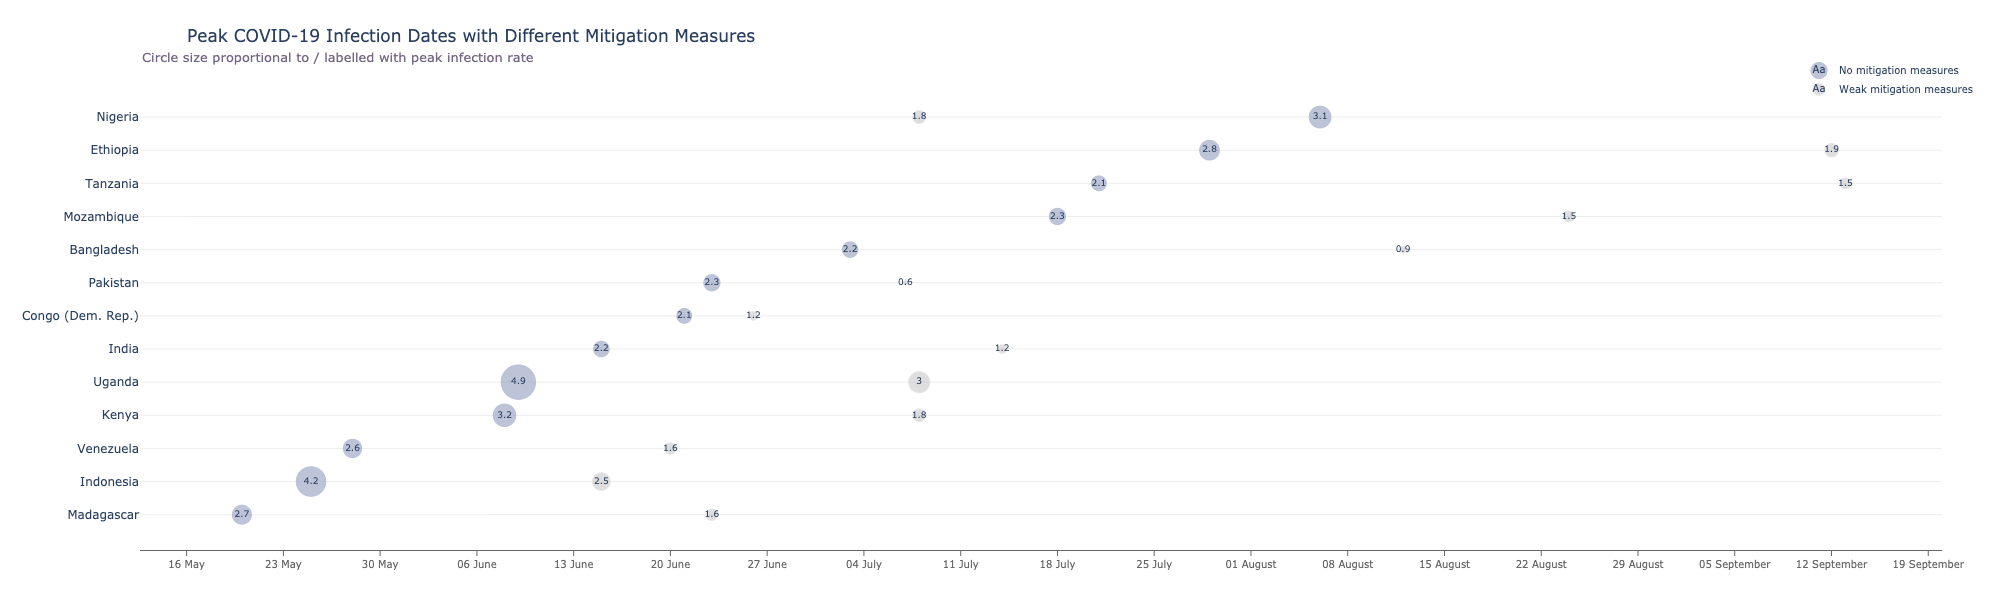

In [118]:
import plotly.graph_objects as go
from dateutil.parser import parse

x_no = covid_data.peak_infection_date_no_mitigation
x_weak = covid_data.peak_infection_date_weak_mitigation

y_no = covid_data.peak_infection_rate_no_mitigation
y_weak = covid_data.peak_infection_rate_weak_mitigation

fig = go.Figure(
    data=[
        go.Scatter(
            x=x_no,
            y=covid_data.Country,
            mode='markers+text',
            text=covid_data.peak_infection_rate_no_mitigation,
            textfont_size=9,
            name='No mitigation measures',
            marker=dict(
                color='rgba(156, 165, 196, 0.95)',
                line_color='rgba(156, 165, 196, 1.0)',
                size=covid_data.peak_infection_rate_no_mitigation.apply(lambda c: c*7)
            )
        ),
        go.Scatter(
            x=x_weak,
            y=covid_data.Country,
            mode='markers+text',
            text=covid_data.peak_infection_rate_weak_mitigation,
            textfont_size=9,
            name='Weak mitigation measures',
            marker=dict(
                color='rgba(204, 204, 204, 0.95)',
                line_color='rgba(217, 217, 217, 1.0)',
                size=covid_data.peak_infection_rate_weak_mitigation.apply(lambda c: c*7)
            )
        )
    ]
)

fig.update_traces(marker=dict(line_width=1, symbol='circle'))

fig.update_layout(
    title={
        'text': "Peak COVID-19 Infection Dates with Different Mitigation Measures",
        'y':0.95,
        'x':0.094,
        'xanchor': 'left',
        'yanchor': 'top'
    },
    yaxis=dict(
        showgrid=True,
        gridcolor='#ededed'
    ),
    xaxis=dict(
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        tickfont_size=10,
        showticklabels=True,
        tickformat = '%d %B',
        ticks='outside',
        dtick=604800000.0,
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=1500,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
    annotations=[
        dict(
            x=0,
            y=1.07,
            xref="paper",
            yref="paper",
            text="Circle size proportional to / labelled with peak infection rate",
            font={
                "size": 13,
                "color": 'rgb(116, 101, 130)',
            },
            showarrow=False,
            align='left'
        )
    ]
)

fig.show()

In [ ]:
# 